# MACHINE LEARNING: USING LOGISTIC REGRESSION ALGORITHM

In [29]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np


In [30]:
mydata=pd.read_csv(r"C:\Users\Surbhi Varshney\Desktop\Data_2019\ChurnData.csv")

In [31]:
mydata.keys()

Index(['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless', 'longmon', 'tollmon', 'equipmon', 'cardmon',
       'wiremon', 'longten', 'tollten', 'cardten', 'voice', 'pager',
       'internet', 'callwait', 'confer', 'ebill', 'loglong', 'logtoll',
       'lninc', 'custcat', 'churn'],
      dtype='object')

In [32]:
#mydata.dtypes

In [33]:
#in sklearn data should be int form 32bit

In [34]:
X_data=mydata[["tenure","age","address","income","ed","employ","equip","callcard","wireless"]]

In [35]:
X_data.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless
0,11,33,7,136,5,5,0,1,1
1,33,33,12,33,2,0,0,0,0
2,23,30,9,30,1,2,0,0,0
3,38,35,5,76,2,10,1,1,1
4,7,35,14,80,2,15,0,1,0


In [36]:
Y_data=mydata["churn"]

In [37]:
Y_data.head(1)

0    1
Name: churn, dtype: int64

In [38]:
print("type of X_data is {} and type of Y_data is {} ".format(type(X_data),type(Y_data)))

type of X_data is <class 'pandas.core.frame.DataFrame'> and type of Y_data is <class 'pandas.core.series.Series'> 


In [39]:
#converting pandas into numpy array

In [40]:
XA=np.asanyarray(X_data)
YA=np.asanyarray(Y_data)

In [41]:
XA[:3]

array([[ 11,  33,   7, 136,   5,   5,   0,   1,   1],
       [ 33,  33,  12,  33,   2,   0,   0,   0,   0],
       [ 23,  30,   9,  30,   1,   2,   0,   0,   0]], dtype=int64)

In [42]:
#feature scaling down

In [43]:
from sklearn import preprocessing

In [44]:
XA=preprocessing.StandardScaler().fit(XA).transform(XA)

C:\Users\Surbhi Varshney\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Surbhi Varshney\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [46]:
#XA[:]
XA_mean=XA.mean()
XA_std=XA.std

In [47]:
print("mean of XA{} and std of XA {} ".format (abs(round(XA_mean)),XA_std))

mean of XA0.0 and std of XA <built-in method std of numpy.ndarray object at 0x000002580E434DA0> 


In [48]:
from sklearn.model_selection import train_test_split

In [69]:
X_train,X_test,Y_train,Y_test=train_test_split(XA,YA,test_size=.30,random_state=101)

In [70]:
from sklearn.linear_model import LogisticRegression

In [80]:
trainer= LogisticRegression(solver='liblinear')

In [81]:
learner=trainer.fit(X_train,Y_train)

In [73]:
Ya=Y_test
Yp=learner.predict(X_test)

In [85]:
Ypprob=learner.predict_proba(X_test)
Ypprob

array([[0.64241803, 0.35758197],
       [0.8836297 , 0.1163703 ],
       [0.98027474, 0.01972526],
       [0.72195865, 0.27804135],
       [0.92890095, 0.07109905],
       [0.65687111, 0.34312889],
       [0.23127199, 0.76872801],
       [0.88404464, 0.11595536],
       [0.9146668 , 0.0853332 ],
       [0.83264624, 0.16735376],
       [0.33574745, 0.66425255],
       [0.38487192, 0.61512808],
       [0.34084969, 0.65915031],
       [0.38965751, 0.61034249],
       [0.94624817, 0.05375183],
       [0.37199755, 0.62800245],
       [0.14535849, 0.85464151],
       [0.3720745 , 0.6279255 ],
       [0.165979  , 0.834021  ],
       [0.65370663, 0.34629337],
       [0.30160355, 0.69839645],
       [0.92762805, 0.07237195],
       [0.95214415, 0.04785585],
       [0.72325012, 0.27674988],
       [0.92150707, 0.07849293],
       [0.94446739, 0.05553261],
       [0.82236403, 0.17763597],
       [0.62144083, 0.37855917],
       [0.88048905, 0.11951095],
       [0.62403012, 0.37596988],
       [0.

In [89]:
P_Y1X=Ypprob[:,0]
P1_Y0x=Ypprob[:,1]

In [90]:
table=pd.DataFrame({"P(Y=1|X)":P_Y1X,"P(Y=0|X)":P1_Y0x})

In [91]:
table[:2]

,P(Y=1|X),P(Y=0|X)
0,0.642418,0.357582
1,0.883630,0.116370


In [92]:
#Evaluation of Classification Algo

In [97]:
from sklearn.metrics import accuracy_score,jaccard_similarity_score

In [98]:
jss=jaccard_similarity_score(Ya,Yp)
accs=accuracy_score(Ya,Yp)

In [99]:
print("jss is {0} and accs is {1} ".format(jss,accs))

jss is 0.7666666666666667 and accs is 0.7666666666666667 


In [104]:
from sklearn.metrics import confusion_matrix,classification_report

In [105]:
my_cm=confusion_matrix(Ya,Yp)

In [106]:
my_cm

array([[37,  8],
       [ 6,  9]], dtype=int64)

In [120]:
table1=pd.DataFrame({"Ya":Ya,"Yp":Yp})
table[:2]

,Ya,Yp
0,0,0
1,0,0


In [ ]:
#import seaborn as sb

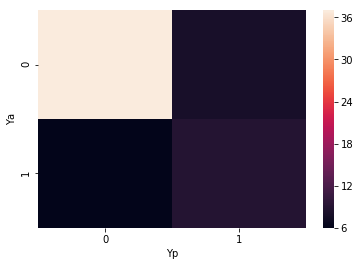

In [122]:
CONMAT=pd.crosstab(table1.Ya,table1.Yp)
sb.heatmap(CONMAT)
plt.show()

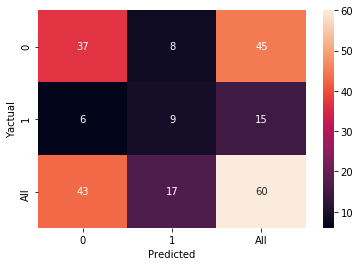

In [123]:
# this is correct
CONMAT=pd.crosstab(table1.Ya,table1.Yp,rownames=["Yactual"],colnames=["Predicted"],margins=True)
sb.heatmap(CONMAT,annot=True)
plt.show()

In [117]:
c_class=my_cm[0,0]+my_cm[1,1]
ts=my_cm.sum()

In [118]:
c_class/ts

0.7666666666666667

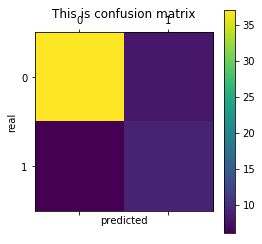

In [119]:
plt.matshow(my_cm)
plt.title("This is confusion matrix")
plt.colorbar()
plt.xlabel("predicted")
plt.ylabel("real")
plt.show()



In [124]:
myclassreport=classification_report(Ya,Yp)

In [125]:
print(myclassreport)

              precision    recall  f1-score   support

           0       0.86      0.82      0.84        45
           1       0.53      0.60      0.56        15

   micro avg       0.77      0.77      0.77        60
   macro avg       0.69      0.71      0.70        60
weighted avg       0.78      0.77      0.77        60



In [110]:
import seaborn as sb

In [126]:
from sklearn.metrics import roc_curve

In [132]:
Ypprr=Ypprob[:,1]

In [135]:
fpr,tpr,th=roc_curve(Ya,Ypprr)

In [136]:
tpr

array([0.        , 0.06666667, 0.13333333, 0.13333333, 0.33333333,
       0.33333333, 0.4       , 0.4       , 0.46666667, 0.46666667,
       0.53333333, 0.53333333, 0.6       , 0.6       , 0.73333333,
       0.73333333, 0.8       , 0.8       , 0.86666667, 0.86666667,
       0.93333333, 0.93333333, 1.        , 1.        ])

In [137]:
fpr

array([0.        , 0.        , 0.        , 0.02222222, 0.02222222,
       0.04444444, 0.04444444, 0.06666667, 0.06666667, 0.11111111,
       0.11111111, 0.15555556, 0.15555556, 0.17777778, 0.17777778,
       0.26666667, 0.26666667, 0.35555556, 0.35555556, 0.55555556,
       0.55555556, 0.66666667, 0.66666667, 1.        ])

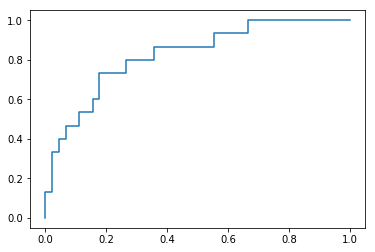

In [138]:
plt.plot(fpr,tpr,label="ROC Curve")
plt.show()